<!-- Contenido -->
<div style="margin-top: 40px;">
  <h2 style="margin-bottom: 4px;">Exámen Final Física Computacional II</h2>
  <div style="margin-top: 20px; font-size: 16px; line-height: 1.6;">
    <p><strong>Sara Alejandra Carvajal cc.1193090281</strong></p>
    <p>Instituto de Física – Universidad de Antioquia<br>
    Facultad de ciencias exactas y naturales</p>
  </div>
</div>

### Ejercicio 1: Componente gráfica de la evolución de los campos

A continuación se analizarán los resultados obtenidos para los valores del campo magnético y del campo eléctrico tras realizar la simulación usando el método FDTD. Para el primer punto se fijan los parámetros $dz = 1$ y $\beta = 0.1$.  

Nos interesa comparar la evolución de los campos con respecto a su estado inicial ($t=0$), para observar cómo se propaga la onda a lo largo de la malla y cómo interactúan los campos eléctrico y magnético.  

Para ello, se mostrarán para 2D y 3D:  
* Gráficas de perfil de los campos en distintos instantes de tiempo, analizando el sistema para diferentes tiempos de la simulación y mostrando el valor de $E_x$ y $H_y$ en todos los nodos de la malla.  
* Comparación con el estado inicial, para visualizar la propagación de la onda y cómo se mantiene la relación entre $E_x$ y $H_y$ a lo largo del tiempo. 
* Simulaciones de la evolución de los campos eléctrico y magnético para una condición de T= 200 tomando datos cada 10 

Cabe mencionar que, para el primer punto los parámetros elegidos cumplen con la condición de Courant y que por ende los campos no presentan comportamientos físicos atípicos.  


In [73]:
#Inicialización de librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D



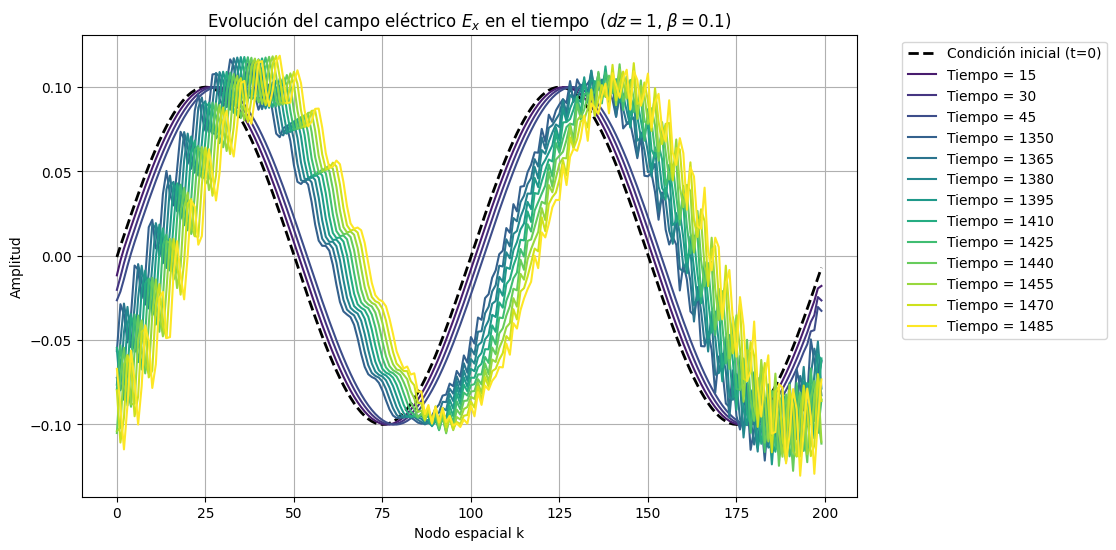

In [86]:
#Leemos el archivo de texto
data = pd.read_csv("data/campos.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"]) #Se guarda como df
steps = data["step"].unique()
steps_to_plot = np.concatenate([steps[:4], steps[-10:]])

plt.figure(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(steps_to_plot)))

for i, n in enumerate(steps_to_plot):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")

plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo  ($dz=1$, $\beta = 0.1$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

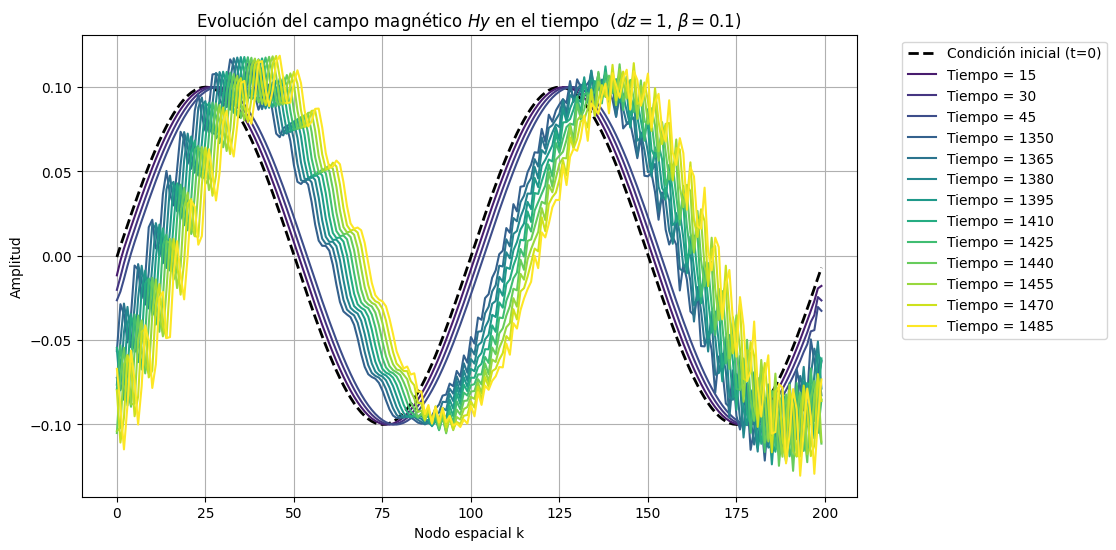

In [88]:
plt.figure(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(steps_to_plot)))

for i, n in enumerate(steps_to_plot):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")

plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $Hy$ en el tiempo  ($dz=1$, $\beta = 0.1$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

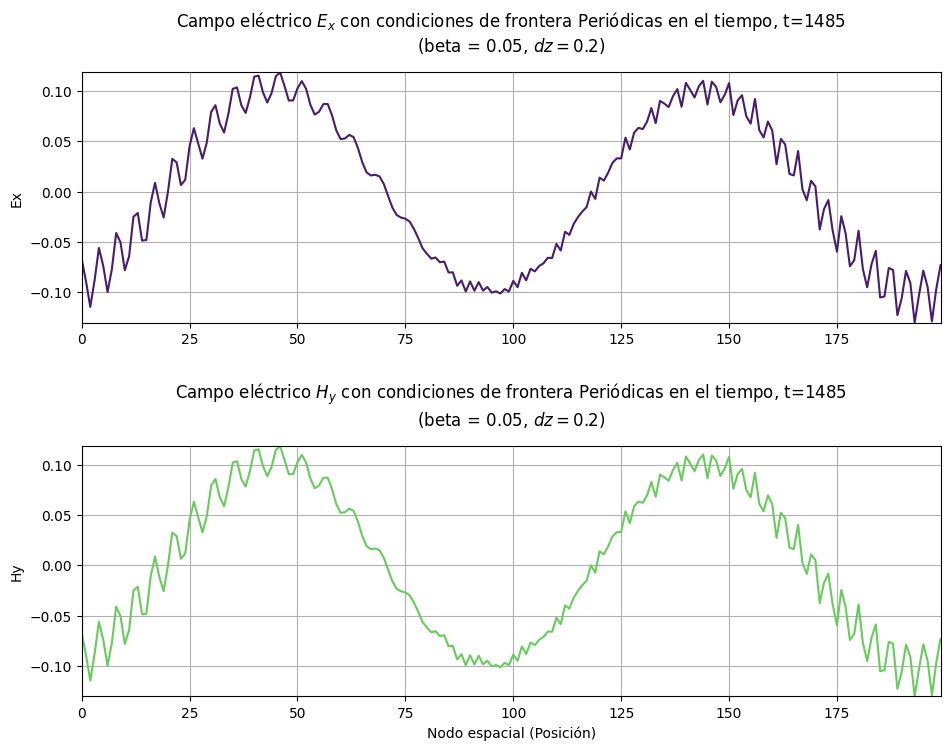

In [93]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.6)
ax1.set_xlim(0, data["k"].max())
ax1.set_ylim(data["Ex"].min(), data["Ex"].max())
ax1.set_ylabel("Ex")
ax1.set_title("Evolución de Ex")
ax1.grid(True)

ax2.set_xlim(0, data["k"].max())
ax2.set_ylim(data["Hy"].min(), data["Hy"].max())
ax2.set_xlabel("Nodo espacial (Posición)")
ax2.set_ylabel("Hy")
ax2.set_title("Evolución de Hy")
ax2.grid(True)

#Se definen los gráficos que se irán actualizando a medida que evoluciona el sistema
Explot, = ax1.plot([], [], color=colors[1])
Hyplot, = ax2.plot([], [], color=colors[10])

def init():
    Explot.set_data([], [])
    Hyplot.set_data([], [])
    return Explot, Hyplot

def animate(i):
    n = steps[i]
    df = data[data["step"] == n]
    Explot.set_data(df["k"], df["Ex"])
    Hyplot.set_data(df["k"], df["Hy"])
    ax1.set_title(
        f"Campo eléctrico $E_x$ con condiciones de frontera Periódicas en el tiempo, t={n}\n"
        r"(beta = 0.05, $dz = 0.2$)",
        pad=15
    )

    ax2.set_title(
        f"Campo eléctrico $H_y$ con condiciones de frontera Periódicas en el tiempo, t={n}\n"
        r"(beta = 0.05, $dz = 0.2$)",
        pad=15
    )
    return Explot, Hyplot

animation_2d = animation.FuncAnimation(fig, animate, frames=len(steps), init_func=init,
                              blit=True, interval=100)

#Extraer la información a .gif
animation_2d.save("campos2D_FDTD.gif", writer='pillow')
plt.tight_layout(pad=2.5)
plt.show()

/home/sara/.local/lib/python3.10/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


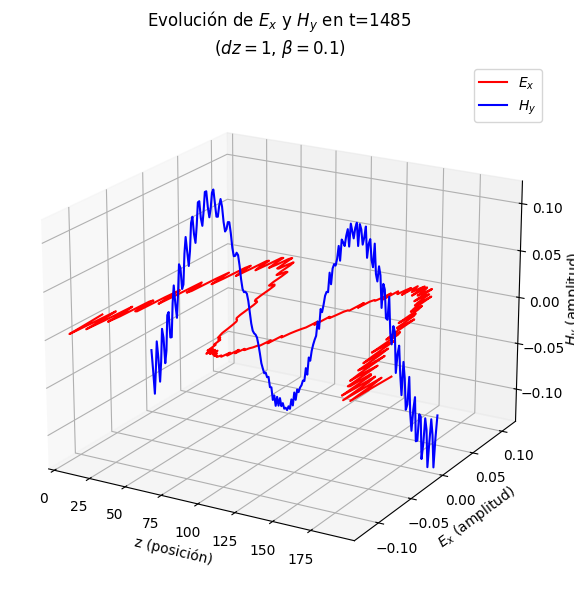

In [99]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

line_Ex, = ax.plot([], [], [], color='r', label="$E_x$")
line_Hy, = ax.plot([], [], [], color='b', label="$H_y$")

ax.set_xlabel("z (posición)")
ax.set_ylabel("$E_x$ (amplitud)")
ax.set_zlabel("$H_y$ (amplitud)")
ax.view_init(elev=20, azim=-60)
ax.legend()

ax.set_xlim(data["k"].min(), data["k"].max())
ax.set_ylim(data["Ex"].min(), data["Ex"].max())
ax.set_zlim(data["Hy"].min(), data["Hy"].max())

def init():
    line_Ex.set_data([], [])
    line_Ex.set_3d_properties([])
    line_Hy.set_data([], [])
    line_Hy.set_3d_properties([])
    return line_Ex, line_Hy

def animate(i):
    n = steps[i]
    df = data[data["step"] == n]
    z = df["k"].values
    Ex = df["Ex"].values
    Hy = df["Hy"].values

    line_Ex.set_data(z, Ex)                 #(z, Ex)
    line_Ex.set_3d_properties(np.zeros_like(z))   #z3D = 0

    line_Hy.set_data(z, np.zeros_like(z))   #(z, 0)
    line_Hy.set_3d_properties(Hy)           #Hy en eje z

    ax.set_title(f"Evolución de $E_x$ y $H_y$ en t={n}\n($dz=1$, $\\beta=0.1$)")
    return line_Ex, line_Hy

anim = animation.FuncAnimation(
    fig, animate, frames=len(steps),
    init_func=init, blit=False, interval=100
)

anim.save("campos3D.gif", writer="pillow")
plt.show()


### Ejercicio 2: Implementación de Condiciones de Frontera de Dirichlet 

Para este segundo ejercicio se implementan las condiciones de frontera de Dirichlet, con el objetivo de analizar cómo varía el comportamiento de la onda al comparar con el caso de condiciones periódicas, manteniendo $N = 200$ nodos para facilitar la comparación directa entre ambas configuraciones.

Adicionalmente, se explorará la influencia de diferentes valores de $\Delta t$ y $\Delta z$ sobre la estabilidad de la simulación, observando cómo estos parámetros afectan la evolución de los campos y la propagación de la onda a lo largo de la malla espacio temporal.



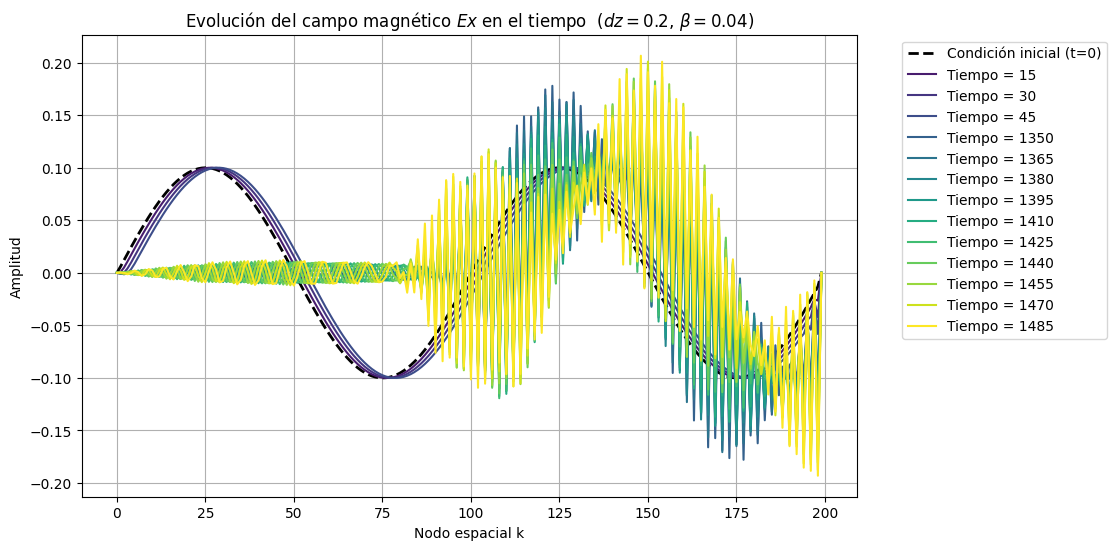

In [104]:
#Leemos el archivo de texto
data = pd.read_csv("campos_Dirichlet.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"]) #Se guarda como df
steps = data["step"].unique()

plt.figure(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(steps_to_plot)))

for i, n in enumerate(steps_to_plot):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")

plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $Ex$ en el tiempo  ($dz=0.2$, $\beta = 0.04$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

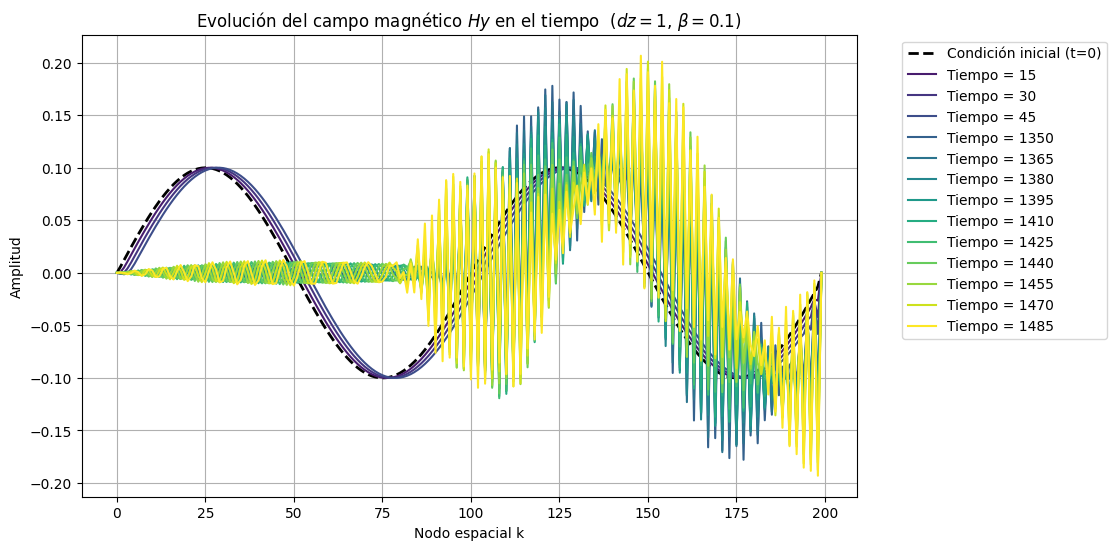

In [105]:
plt.figure(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(steps_to_plot)))

for i, n in enumerate(steps_to_plot):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")

plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $Hy$ en el tiempo  ($dz=1$, $\beta = 0.1$)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [109]:
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

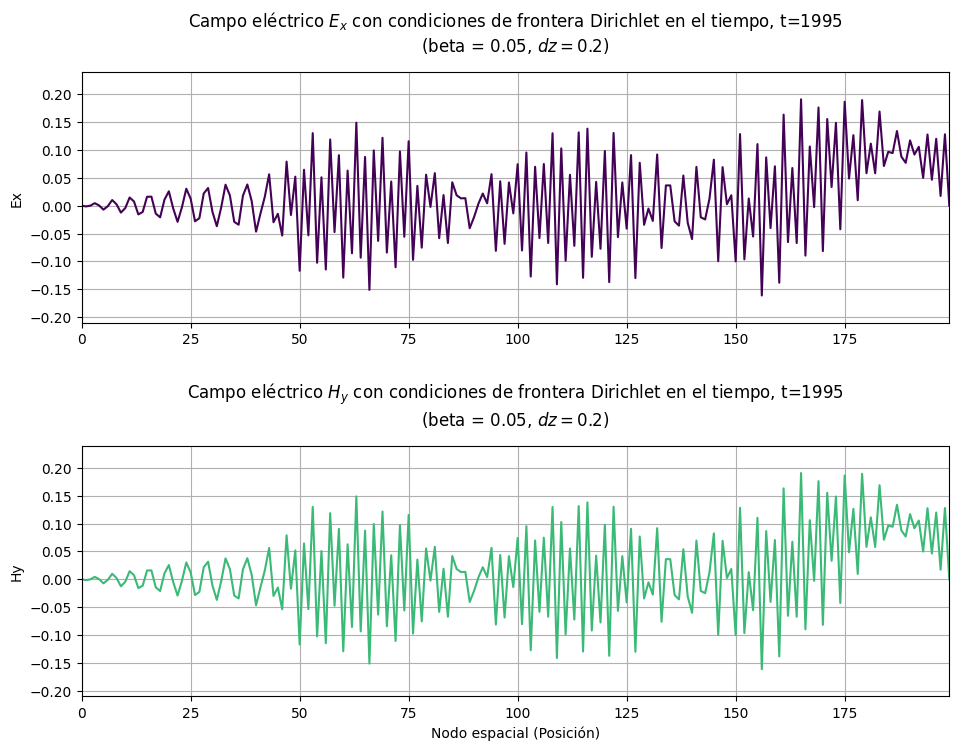

In [112]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.6)

ax1.set_xlim(0, data["k"].max())
ax1.set_ylim(data["Ex"].min(), data["Ex"].max())
ax1.set_ylabel("Ex")
ax1.set_title("Evolución de Ex")
ax1.grid(True)

ax2.set_xlim(0, data["k"].max())
ax2.set_ylim(data["Hy"].min(), data["Hy"].max())
ax2.set_xlabel("Nodo espacial (Posición)")
ax2.set_ylabel("Hy")
ax2.set_title("Evolución de Hy")
ax2.grid(True)

#Se definen los gráficos que se irán actualizando a medida que evoluciona el sistema
Explot, = ax1.plot([], [], color=colors[1])
Hyplot, = ax2.plot([], [], color=colors[90])

def init():
    Explot.set_data([], [])
    Hyplot.set_data([], [])
    return Explot, Hyplot

def animate(i):
    n = steps[i]
    df = data[data["step"] == n]
    Explot.set_data(df["k"], df["Ex"])
    Hyplot.set_data(df["k"], df["Hy"])
    ax1.set_title(
        f"Campo eléctrico $E_x$ con condiciones de frontera Dirichlet en el tiempo, t={n}\n"
        r"(beta = 0.05, $dz = 0.2$)",
        pad=15  # separa el título de la gráfica
    )

    ax2.set_title(
        f"Campo eléctrico $H_y$ con condiciones de frontera Dirichlet en el tiempo, t={n}\n"
        r"(beta = 0.05, $dz = 0.2$)",
        pad=15
    )
    return Explot, Hyplot

animation_2d = animation.FuncAnimation(fig, animate, frames=len(steps), init_func=init,
                              blit=True, interval=100)

#Extraer la información a .gif
animation_2d.save("campos2D_FDTD_Dirichlet.gif", writer='pillow')
plt.tight_layout(pad=2.5)
plt.show()

#### Ejercicio 2 parte b

En este caso mostraré algunas gráficas que evidencien el cambio del comportamiento al variar $\Delta x$ o $\Delta z$

1er caso: Fijando $\Delta z=0.1$ y variando $\Delta t = [0.2,0.3,0.5]$

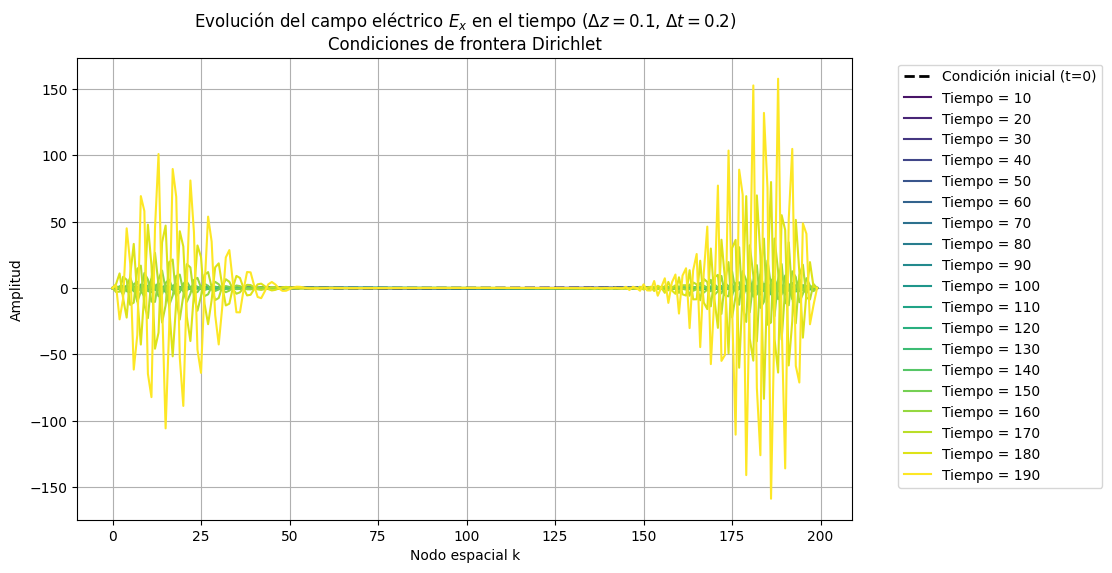

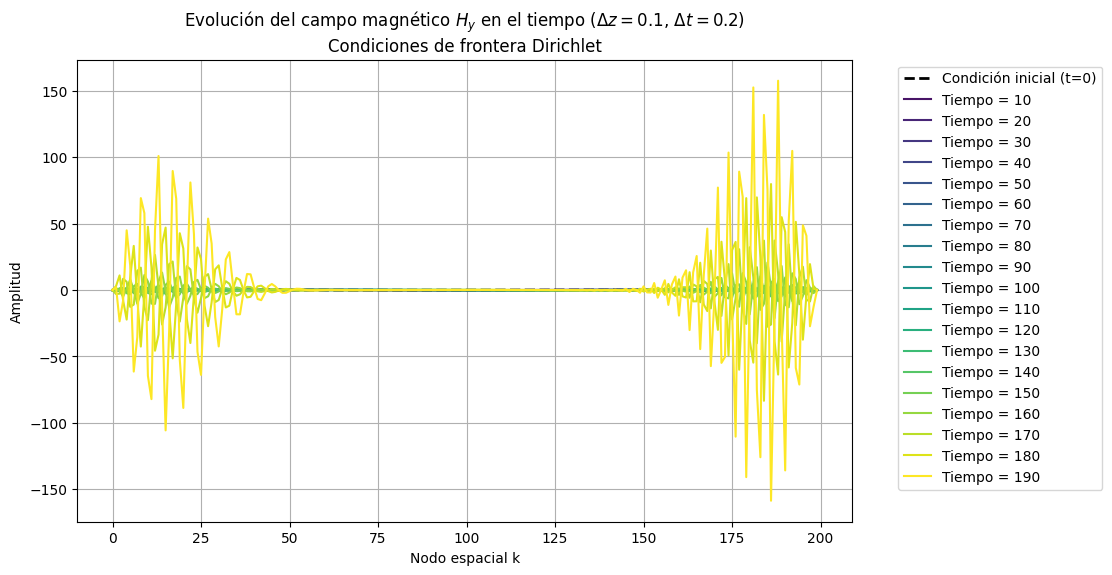

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_z1_t0.2.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


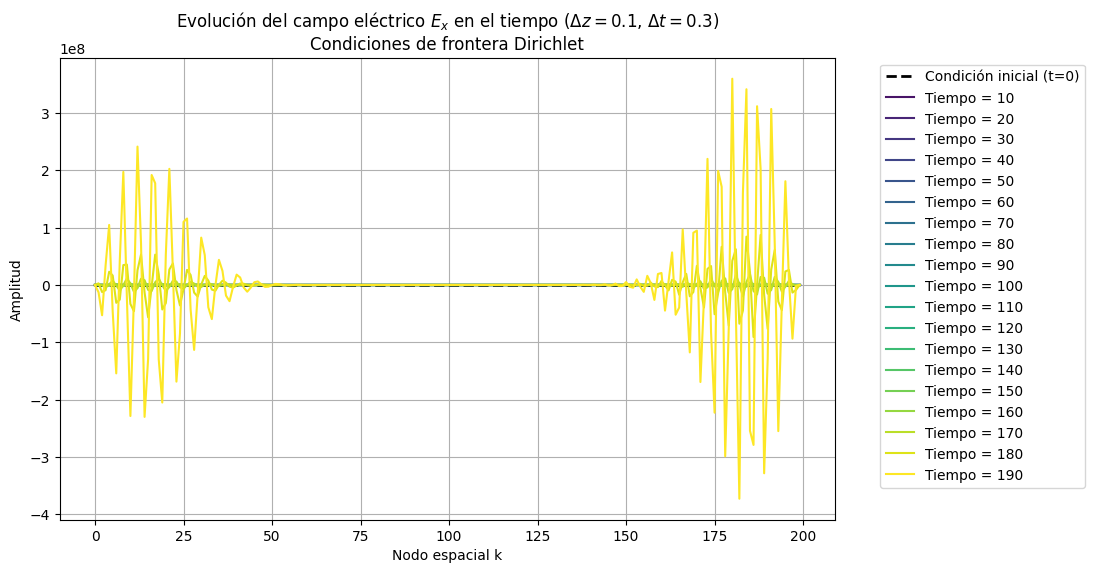

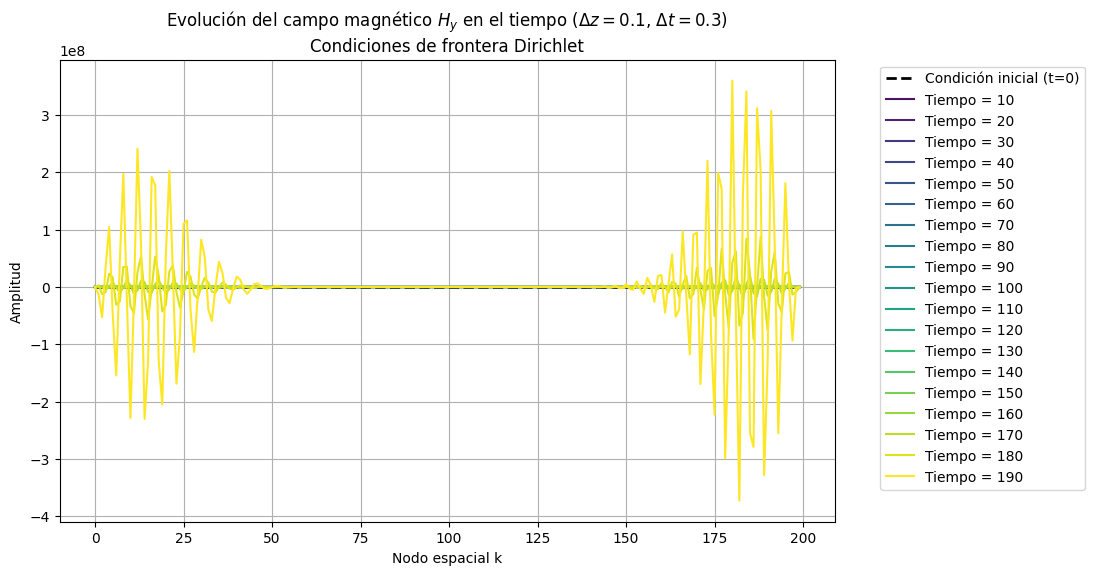

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_z1_t0.3.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.3$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.3$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


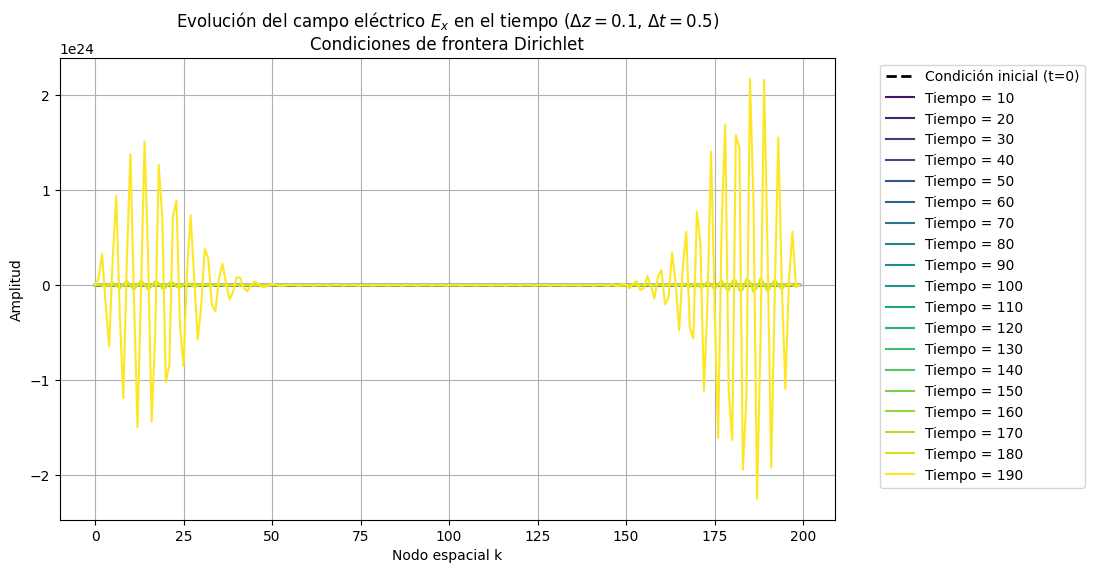

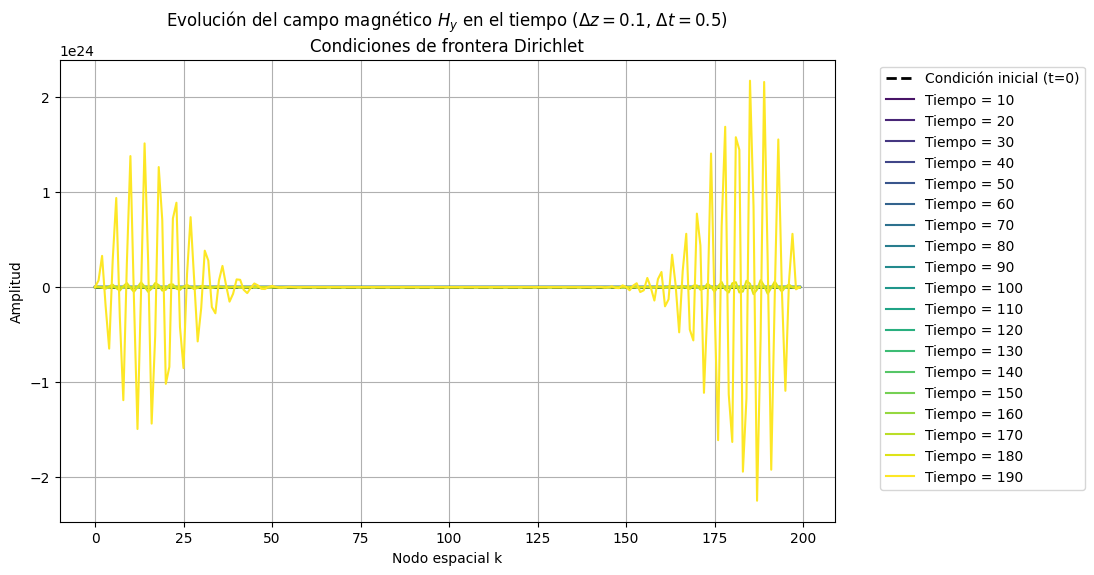

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_z1_t0.5.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.5$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=0.1$, $\Delta t=0.5$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


2do caso:  Fijando $\Delta t=0.2$ y variando $\Delta z = [0.5,1,2]$

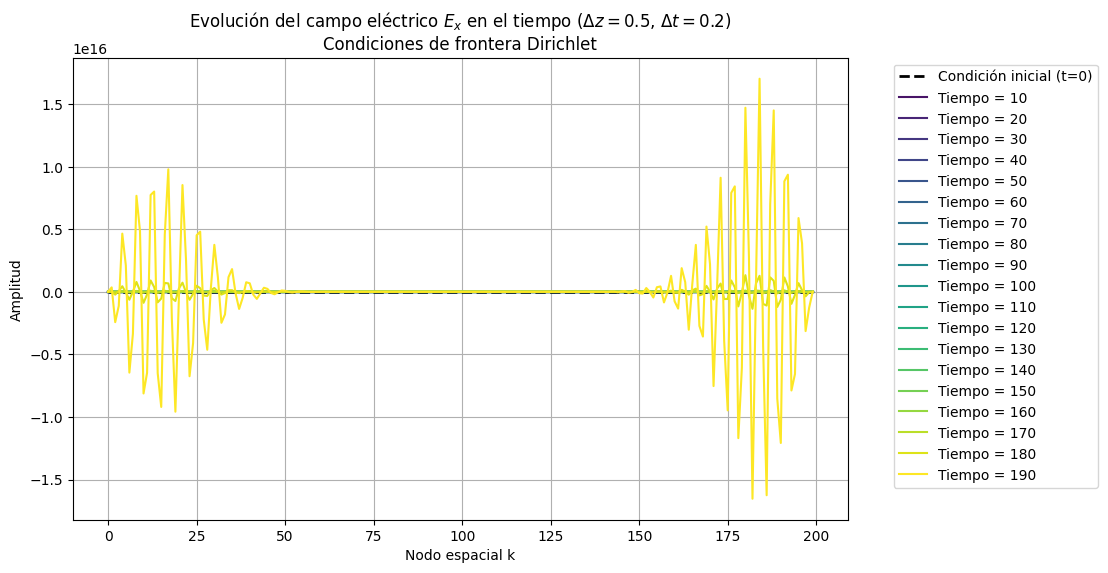

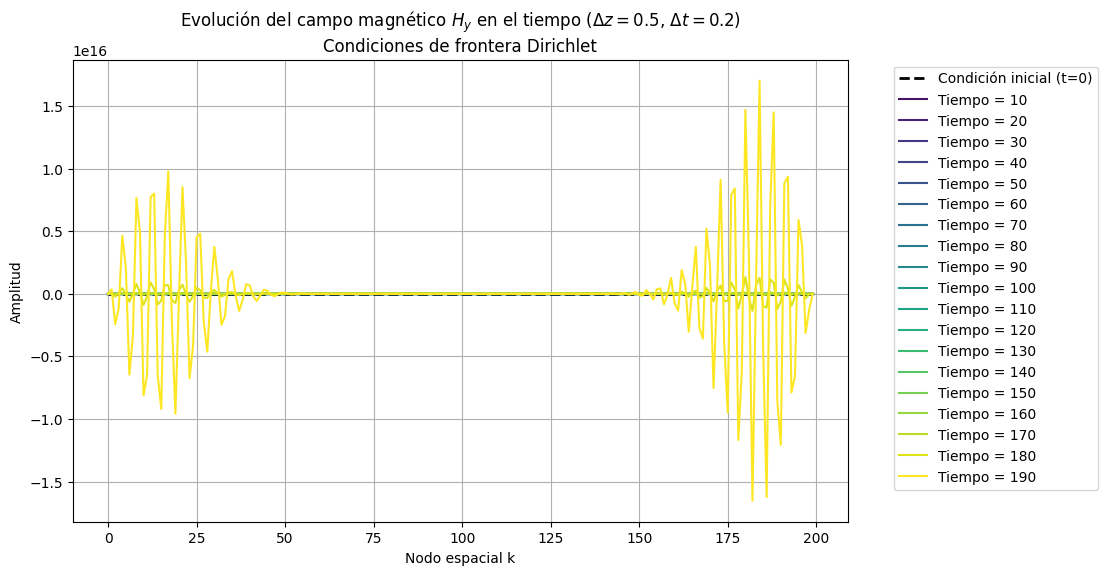

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_t0.2_z0.5.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=0.5$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=0.5$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

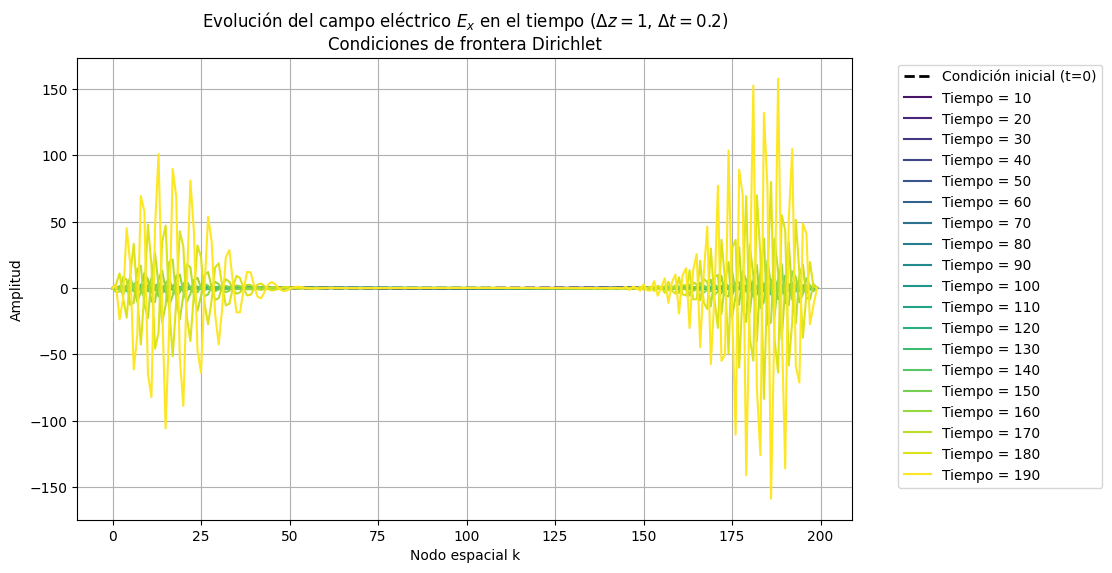

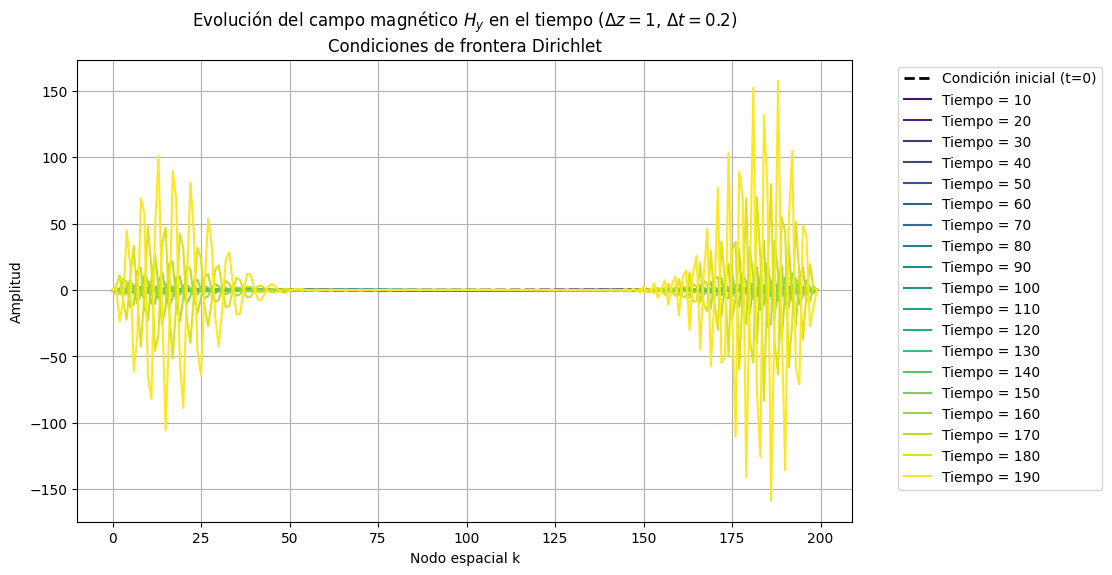

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_t0.2_z1.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=1$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=1$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

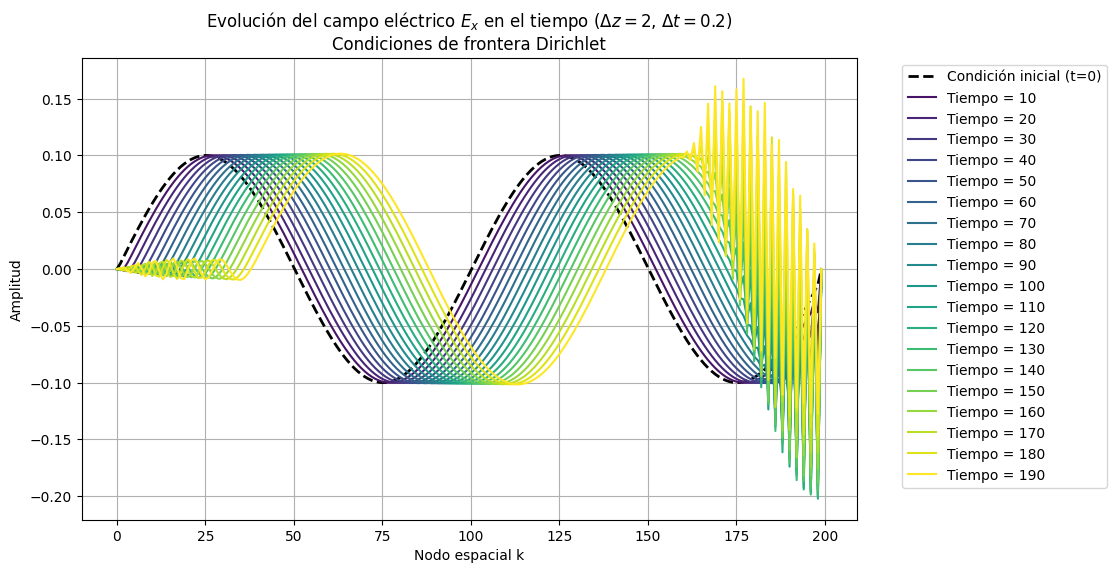

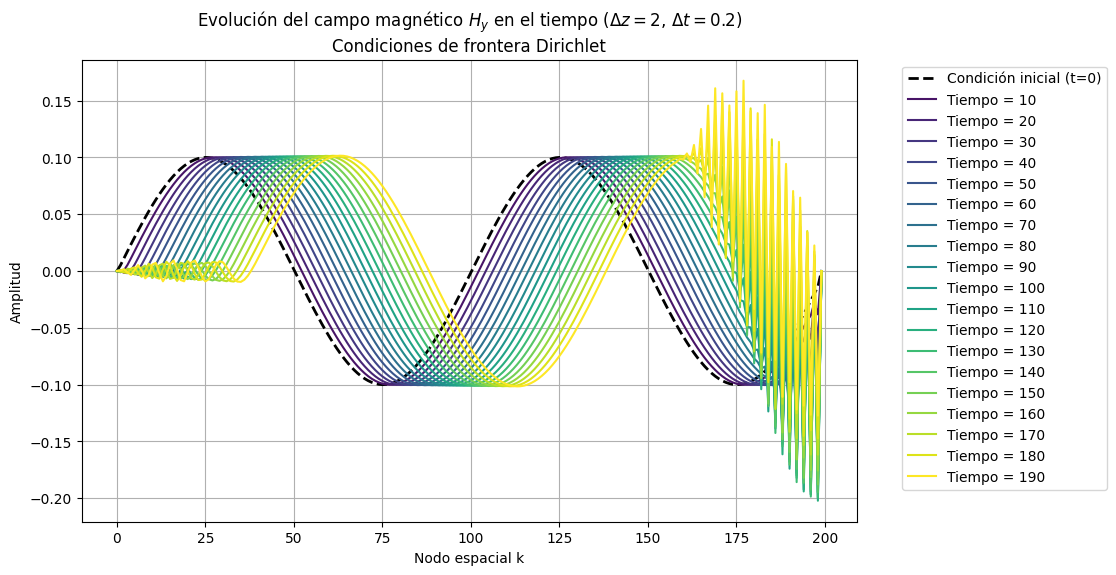

In [ ]:
# Leemos el archivo de texto
data = pd.read_csv("data/campos_t0.2_z2.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\Delta z=2$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\Delta z=2$, $\Delta t=0.2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

Punto c: Comparación de $\beta$ tomando algunos casos que no cumplan la condición de Courant

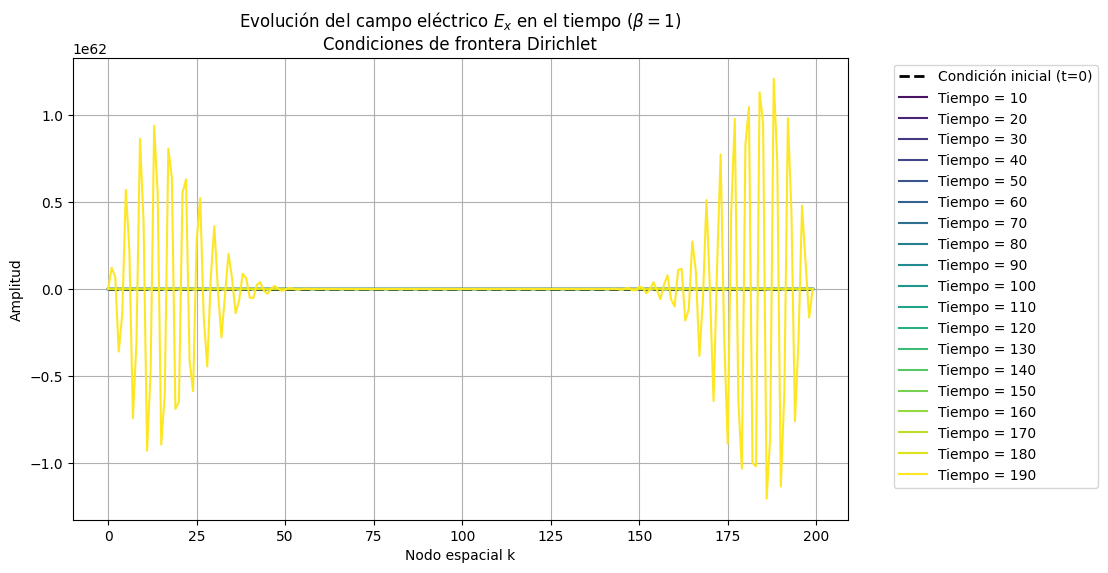

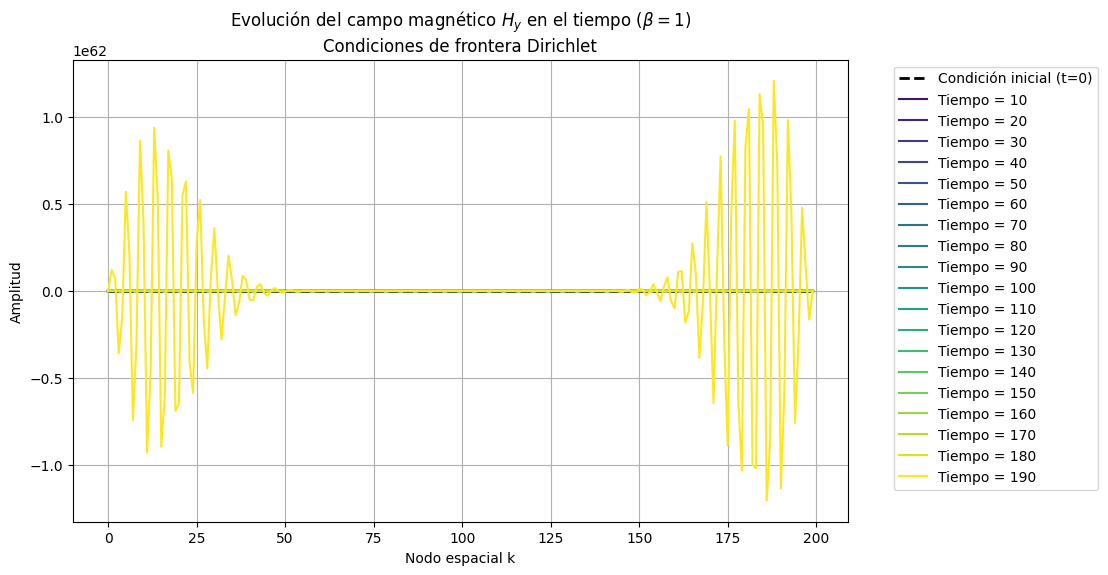

In [116]:
# Leemos el archivo de texto
data = pd.read_csv("data/camposnoestabilidad1.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\beta=1$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\beta =1 $)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

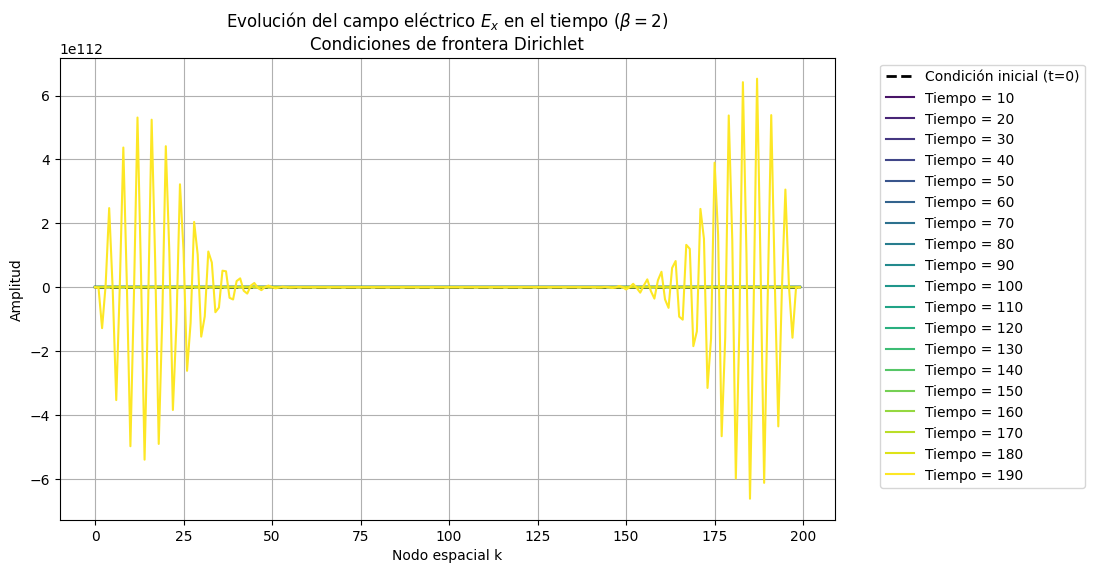

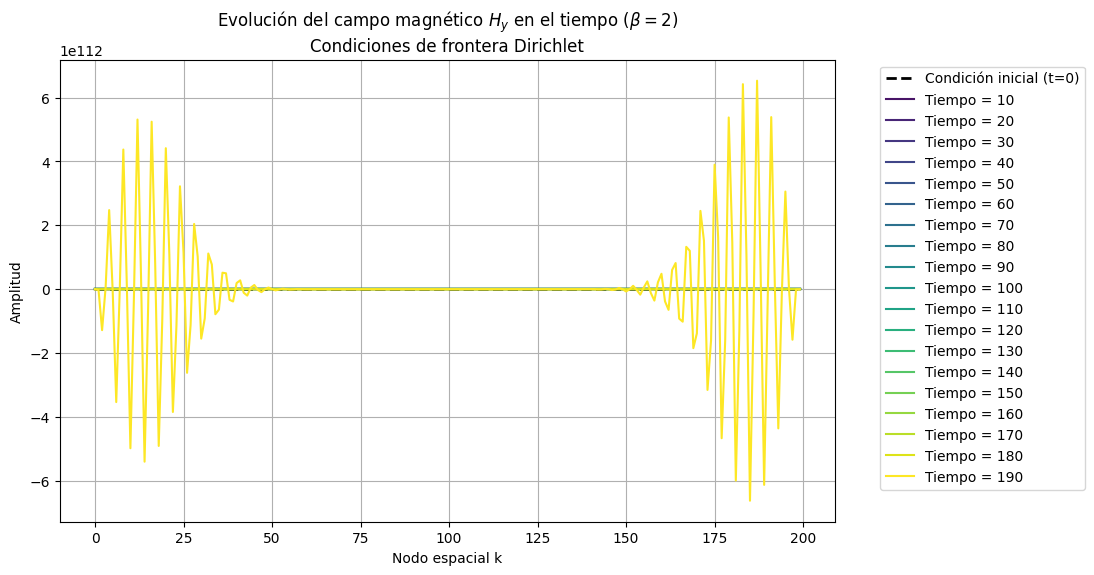

In [117]:
# Leemos el archivo de texto
data = pd.read_csv("data/camposnoestabilidad2.txt", sep=r"\s+", header=None, names=["step", "k", "Ex", "Hy"])
steps = data["step"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(steps)))

# Gráfico del campo eléctrico Ex
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Ex"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Ex"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo eléctrico $E_x$ en el tiempo ($\beta= 2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Gráfico del campo magnético Hy
plt.figure(figsize=(10,6))
for i, n in enumerate(steps):
    df = data[data["step"] == n]
    if n == 0:
        plt.plot(df["k"], df["Hy"], 'k--', linewidth=2, label="Condición inicial (t=0)")
    else:
        plt.plot(df["k"], df["Hy"], color=colors[i], label=f"Tiempo = {n}")
plt.xlabel("Nodo espacial k")
plt.ylabel("Amplitud")
plt.title(r"Evolución del campo magnético $H_y$ en el tiempo ($\beta= 2$)" 
          f"\nCondiciones de frontera Dirichlet")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()